## Importing the dataset and the packages

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\\Python Projects\\Linear_Regression\\Ecommerce_Customers.csv")
df.head()

Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       835 Frank Tunnel\nWrightmouth, MI 82180-9605            Violet   
1     4547 Archer Common\nDiazchester, CA 06566-8576         DarkGreen   
2  24645 Valerie Unions Suite 582\nCobbborough, D...            Bisque   
3   1414 David Throughway\nPort Jason, OH 22070-1220       SaddleBrown   
4  14023 Rodriguez Passage\nPort Jacobville, PR 3...  MediumAquaMarine   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


We will only be using numerical values. So we are going to work with column 3 to 7.

In [188]:
df.describe()

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

This gives us an idea of the overall information! It could be helpful to see if our model is acurate.

## Data Analysis

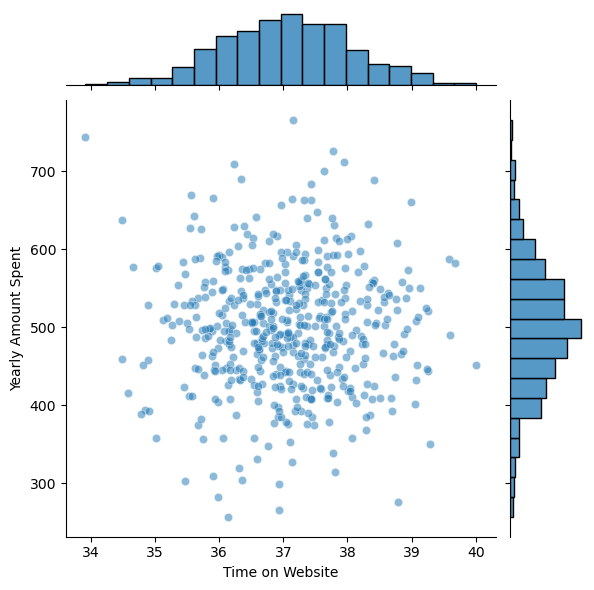

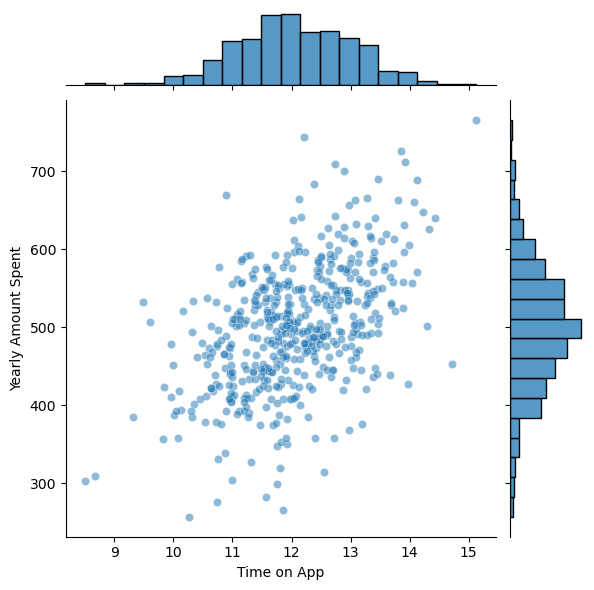

In [189]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=df, alpha=0.5)
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=df, alpha=0.5)

We can observe a correlation in the second graph. Instead of checking for each variable, we can pairplot every numerical values to see the correlation between each one!

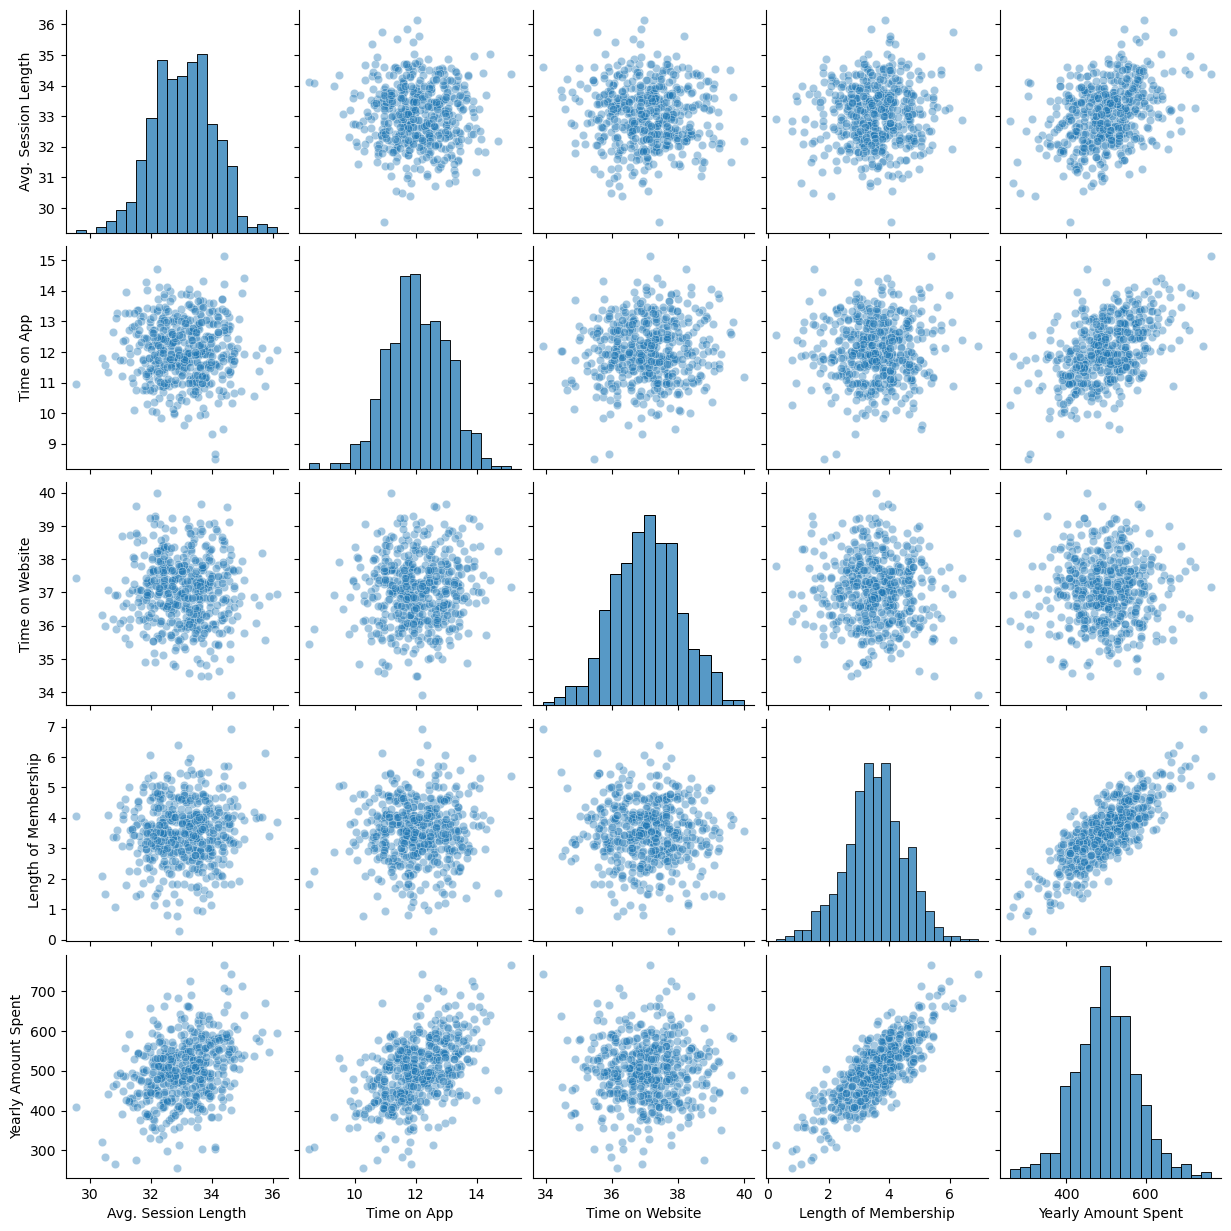

In [190]:
sns.pairplot(df,kind='scatter', plot_kws={'alpha':0.4})

It seems like there's a strong correlation between the length of the membership and the yearly amount spent.

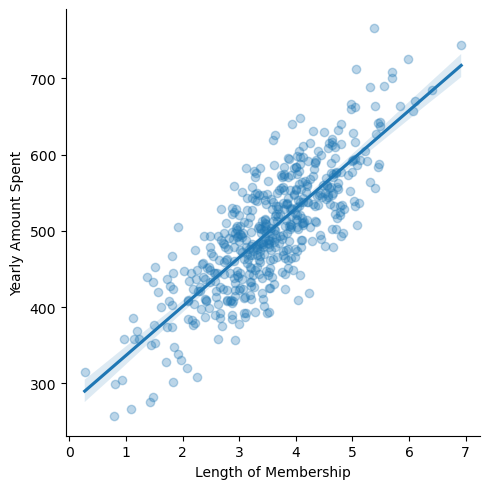

In [191]:
sns.lmplot(x='Length of Membership',
           y='Yearly Amount Spent',
           data=df,
           scatter_kws={'alpha':0.3})

Here, we can see that we can draw a regresssion line using these two variables.  
The formula is simple: y= ax + b and it comes from mathematical calculations that aim to reduce the total distance of every points to the line. In order to do that with multiple variables, we will train a model using Scikit-Learn.

In [192]:
from sklearn.model_selection import train_test_split
X = df[['Avg. Session Length','Time on App','Time on Website', 'Length of Membership']]
y= df['Yearly Amount Spent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [193]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(X_train, y_train)
cdf = pd.DataFrame(mdl.coef_, X.columns, columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


This is the coefficient of each variable. Instead of having y = ax + b, it is y = ax + cx +dx + ex + b!

## Make predictions

In [194]:
predictions = mdl.predict(X_test)

Text(0.5, 1.0, 'Evaluation of our LM model')

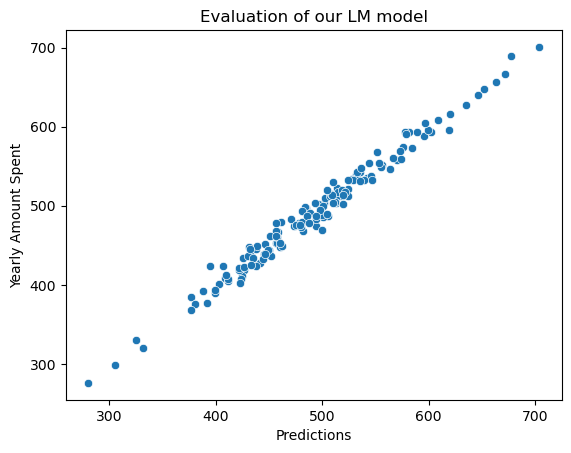

In [195]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predictions')
plt.title("Evaluation of our LM model")

Ideally, the scatter plot should form a straight line with a slope of 1. However, there's other ways to measure the accuracy of our Linear Regression model.

In [196]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))
df.describe()

Mean Absolute Error:  8.426091641432128
Mean Squared Error:  103.91554136503363
RMSE:  10.193897260863169


Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462